<a href="https://colab.research.google.com/github/bulnes42/csulb-cecs456-finalProject/blob/main/FinalProject_PreliminaryModel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os #Do I need this import files
import time
import tensorflow as tf
from tensorflow import keras
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image



In [2]:

# add directory information for each class
dataset_folder = "drive/MyDrive/dataset"
abdomenCT_folder = "drive/MyDrive/dataset/AbdomenCT"
breastMRI_folder = "drive/MyDrive/dataset/BreastMRI"
chestCT_folder = "drive/MyDrive/dataset/ChestCT"
cxr_folder = "drive/MyDrive/dataset/CXR"
hand_folder = "drive/MyDrive/dataset/Hand"
headCT_folder = "drive/MyDrive/dataset/HeadCT"

# Create dictionary of classes
classes = {
    'AbdomenCT': 0, 
    'BreastMRI': 1, 
    'ChestCT': 2, 
    'CXR': 3,
    'Hand': 4, 
    'HeadCT': 5
}


In [ ]:
# load images into lists
def load_images_from_folder(folder, label_list, label):
  images = []
  for image in os.listdir(folder):
    images.append(image)
    label_list.append(classes.get(label))
  return images

# Load images into lists and accumulate number of total images
total_images = 0
abdomentCT_labels = []
abdomentCT_images = load_images_from_folder(abdomenCT_folder, abdomentCT_labels, 'AbdomentCT')
total_images += len(abdomentCT_labels)

breastMRI_lables = []
breastMRI_images = load_images_from_folder(breastMRI_folder, breastMRI_lables, 'BreastMRI')
total_images += len(breastMRI_lables)

chestCT_labels = []
chestCT_images = load_images_from_folder(chestCT_folder, chestCT_labels, 'ChestCT')
total_images += len(chestCT_labels)

cxr_labels = []
cxr_images = load_images_from_folder(cxr_folder, cxr_labels, 'CXR')
total_images += len(cxr_labels)

hand_labels = []
hand_images = load_images_from_folder(hand_folder, hand_labels, 'Hand')
total_images += len(hand_labels)

headCT_labels = []
headCT_images = load_images_from_folder(headCT_folder, headCT_labels, 'HeadCT')
total_images += len(headCT_labels)



In [ ]:
#calculate percents
abdomenCT_percent = len(abdomentCT_images)/total_images * 100
breastMRI_percent = len(breastMRI_images) / total_images * 100
chestCT_percent = len(chestCT_images) / total_images * 100
cxr_percent = len(cxr_images) / total_images * 100
hand_percent = len(hand_images) / total_images * 100
headCT_percent = len(headCT_images) / total_images * 100
percent_list = [abdomenCT_percent, breastMRI_percent, cxr_percent, chestCT_percent, hand_percent, headCT_percent]

# print out the images, labels, and percent for each class to see any skewed data
print("abdomentCT images", len(abdomentCT_images))
print("abdomentCT labels ", len(abdomentCT_labels))

print("abdomentCT percent , " + str(abdomenCT_percent))
print("breastMRI images ", len(breastMRI_images))
print("breastMRI labels ", len(breastMRI_lables))
print("breastMRI percent , " + str(breastMRI_percent))
print("chestCT images ", len(chestCT_images))
print("chestCT labels ", len(chestCT_labels))
print("chestCT percent ", str(chestCT_percent))
print("cxr images ", len(cxr_images))
print("cxr labels ", len(cxr_labels))
print("cxr percent ", str(cxr_percent))
print("hand images ",len(hand_images))
print("hand labels ", len(hand_labels))
print("hand percent ", str(hand_percent))
print("headCT images ", len(headCT_images))
print("headCT labels ", len(headCT_labels))
print("headCT percent ", str(headCT_percent))

abdomentCT images 10010
abdomentCT labels  10010
abdomentCT percent , 16.964951528709918
breastMRI images  8964
breastMRI labels  8964
breastMRI percent , 15.192190359975594
chestCT images  10010
chestCT labels  10010
chestCT percent  16.964951528709918
cxr images  10020
cxr labels  10020
cxr percent  16.981899532235104
hand images  10000
hand labels  10000
hand percent  16.94800352518473
headCT images  10000
headCT labels  10000
headCT percent  16.94800352518473


In [3]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(dataset_folder, labels='inferred', batch_size=64, image_size=(64, 64))
# Define image parameters

BATCH_SIZE=64
NUM_CLASSES = 6
EPOCHS = 20 # try out a large number then decrease as needed`


Found 59004 files belonging to 6 classes.


##Display same images

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


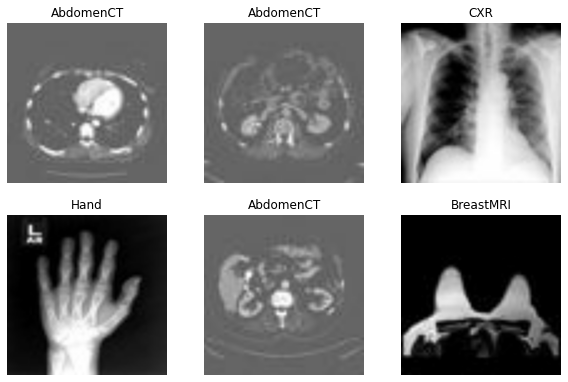

In [ ]:
class_names = dataset.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

##Display Pie chart of data distribution

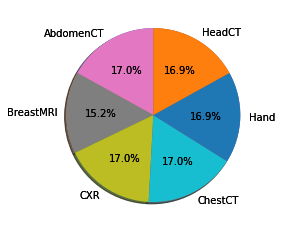

In [ ]:
figure, axis = plt.subplots()
# Customized pie chart
axis.pie(percent_list,   labels=class_names,
        autopct='%1.1f%%',shadow=True, startangle=90)
patches, texts, auto = axis.pie(percent_list,  labels=class_names,
        autopct='%1.1f%%',shadow=True, startangle=90)
# Show the piechart using the show() function.
plt.show()

##Prepare Dataset

In [4]:
dataset.shuffle(58954)
train_size = int(len(dataset)*.7)
validation_size = int(len(dataset)*.2)
test_size = int(len(dataset)*.1)

In [5]:
training_dataset = dataset.take(train_size)
validation_dataset = dataset.skip(train_size).take(validation_size)
test_dataset = dataset.skip(train_size + validation_size).take(test_size)

#Build Model

In [6]:
#build a model
preliminary_vggmodel = tf.keras.models.Sequential()
preliminary_vggmodel.add(tf.keras.layers.Conv2D(filters=16, kernel_size=[3, 3], activation="relu", padding="same",input_shape=[64, 64, 3]))
preliminary_vggmodel.add(tf.keras.layers.Conv2D(filters=16, kernel_size=[3, 3], activation="relu", padding="same"))
preliminary_vggmodel.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
preliminary_vggmodel.add(tf.keras.layers.Conv2D(filters=32, kernel_size=[3, 3], activation="relu", padding="same"))
preliminary_vggmodel.add(tf.keras.layers.Conv2D(filters=32, kernel_size=[3, 3], activation="relu", padding="same"))
preliminary_vggmodel.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
preliminary_vggmodel.add(tf.keras.layers.Conv2D(filters=64, kernel_size=[3, 3], activation="relu", padding="same"))
preliminary_vggmodel.add(tf.keras.layers.Conv2D(filters=64, kernel_size=[3, 34], activation="relu", padding="same"))
preliminary_vggmodel.add(tf.keras.layers.Flatten())
preliminary_vggmodel.add(tf.keras.layers.Dense(units=64, activation="relu"))
preliminary_vggmodel.add(tf.keras.layers.Dense(units = 32, activation = "relu"))
preliminary_vggmodel.add(tf.keras.layers.Dense(units = 6, activation = "softmax"))
preliminary_vggmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                    

In [7]:
preliminary_vggmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                    

In [8]:
preliminary_vggmodel.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
history = preliminary_vggmodel.fit(training_dataset, validation_data=validation_dataset, batch_size=256, epochs=20)

Epoch 1/20
645/645 [==============================] - 3311s 5s/step - loss: 0.1256 - accuracy: 0.9758 - val_loss: 0.0133 - val_accuracy: 0.9950
Epoch 2/20
645/645 [==============================] - 36s 56ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0178 - val_accuracy: 0.9935
Epoch 3/20
645/645 [==============================] - 36s 56ms/step - loss: 0.0374 - accuracy: 0.9916 - val_loss: 0.0090 - val_accuracy: 0.9986
Epoch 4/20
645/645 [==============================] - 36s 55ms/step - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.0080 - val_accuracy: 0.9975
Epoch 5/20
645/645 [==============================] - 35s 54ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0022 - val_accuracy: 0.9996
Epoch 6/20
645/645 [==============================] - 36s 55ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0092 - val_accuracy: 0.9975
Epoch 7/20
645/645 [==============================] - 36s 55ms/step - loss: 0.0111 - accuracy: 0.9972 - val_loss: 0.0040 - val_accuracy:

In [10]:
test_loss, test_accuracy = preliminary_vggmodel.evaluate(test_dataset)
print("test loss = ", test_loss)
print("test accuray = ", test_accuracy)

92/92 [==============================] - 353s 4s/step - loss: 0.0046 - accuracy: 0.9997
test loss =  0.004647975787520409
test accuray =  0.999660313129425


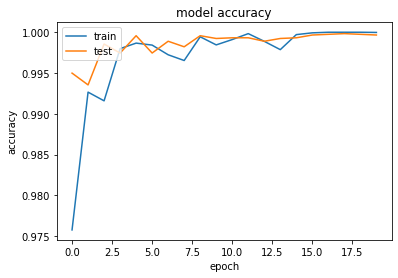

In [11]:
#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

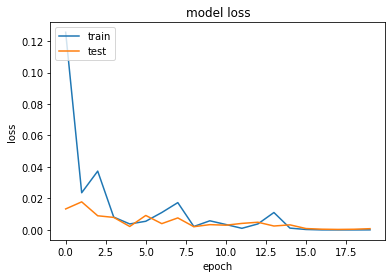

In [12]:
#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()